In [12]:
import os
import itertools
import glob
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker
import matplotlib.pyplot as plt


sns.set(font_scale=0.9, style='whitegrid', font='CMU Sans Serif')

# # drawio colors
# # 189,215,238
# # 255,230,153
# pal = sns.color_palette(['#BDD7EE', '#FFE699'])
# sns.set_palette(pal)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['figure.figsize'] = (4.5,2)
mpl.rcParams['figure.dpi'] = 100

In [13]:
# parse and clean up data
experiments = [
    {
        "file": "./cbf.out",
        "name": "Content-based Filtering",
        "in": "unfiltered",
        "out": "filtered",
    },
    {
        "file": "./condense.out",
        "name": "Message Transformation",
        "in": "raw",
        "out": "processed",
    },
    {
        "file": "./transform.out",
        "name": "Data De-duplication",
        "in": "raw",
        "out": "processed",
    },
]

for e in experiments:
    with open(f"./{e['file']}.csv", "w") as outfile:
        outfile.write("topic,time_ns\n")
        with open(e["file"]) as infile:
            # iterate through the lines
            # look for a line along "Time for topic Topic(topic=unfiltered) difference: 1280875"
            # see if the topic is the in or out topic
            # write down the time
            lines = infile.readlines()
            for line in lines:
                if "Time for topic Topic(topic=" in line:
                    topic = line.split("Time for topic Topic(topic=")[1].split(")")[0]
                    time = line.split("difference: ")[1].split(" ")[0]
                    if topic == e["in"]:
                        outfile.write(f"Baseline,{time}")
                    elif topic == e["out"]:
                        outfile.write(f"Lotus,{time}")

In [14]:
dfs = []
for e in experiments:
    df = pd.read_csv(f"./{e['file']}.csv")
    df["experiment"] = e["name"]
    dfs.append(df)

df = pd.concat(dfs)
df.reset_index(inplace=True, drop=True)
# make a ms column
df["time_ms"] = df["time_ns"] / 1000000

webf NOT subset; don't know how to subset; dropped


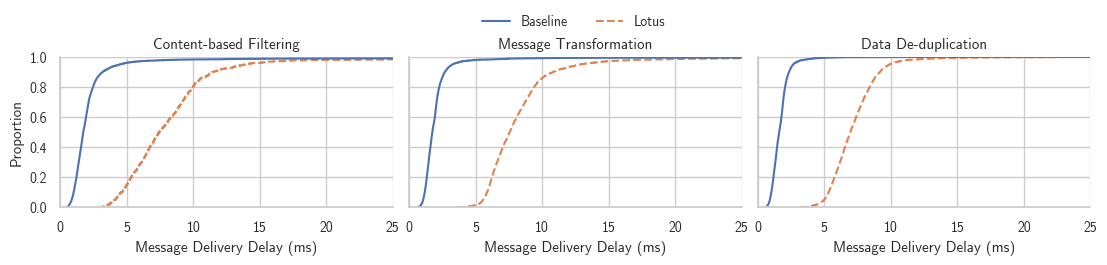

In [15]:
# make a few graphs!
# 3 plots per row
g = sns.displot(data=df, x="time_ms", hue="topic", kind="ecdf", col="experiment", col_wrap=3, height=2.5, aspect=3/2)
g.set_titles("{col_name}")
# make legend outside and horizontal, no title
sns.move_legend(g, loc='upper center', bbox_to_anchor=(0.475, 1.075, 0, 0), ncol=2, title=None)

# https://stackoverflow.com/questions/70089199/how-to-set-a-different-linestyle-for-each-hue-group-in-a-kdeplot-displot
axes = g.axes.flat
lss = ['--', '-']

for ax in axes:
    for line, ls in zip(ax.lines, lss):
        line.set_linestyle(ls)
handles = g._legend.legendHandles[::-1]
for handle, ls in zip(handles, lss):
    handle.set_ls(ls)

g.set_xlabels("Message Delivery Delay (ms)")
# make 25 the xlim
g.set(xlim=(0, 25))

g.savefig("cdf.pdf", bbox_inches='tight')

In [16]:
df[(df["experiment"] == "Content-based Filtering") & (df["topic"] == "Baseline")]["time_ms"].describe()

count    5000.000000
mean        2.538034
std         5.206229
min         0.467500
25%         1.304937
50%         1.734542
75%         2.274459
max        81.933667
Name: time_ms, dtype: float64

In [17]:
df[(df["experiment"] == "Content-based Filtering") & (df["topic"] == "Lotus")]["time_ms"].describe()

count    1048.000000
mean        8.591168
std         6.869439
min         2.805541
25%         5.757969
50%         7.458270
75%         9.589646
max        90.099250
Name: time_ms, dtype: float64

In [18]:
df[(df["experiment"] == "Message Transformation") & (df["topic"] == "Baseline")]["time_ms"].describe()

count    5000.000000
mean        2.217983
std         4.037936
min         0.612208
25%         1.404333
50%         1.753396
75%         2.158813
max       122.741375
Name: time_ms, dtype: float64

In [19]:
df[(df["experiment"] == "Message Transformation") & (df["topic"] == "Lotus")]["time_ms"].describe()

count    5000.000000
mean        8.605662
std         8.188191
min         3.639583
25%         6.417968
50%         7.573271
75%         9.069240
max       322.004333
Name: time_ms, dtype: float64

In [20]:
8.605662 - 2.217983

6.387679

In [21]:
df[(df["experiment"] == "Data De-duplication") & (df["topic"] == "Baseline")]["time_ms"].describe()

count    5000.000000
mean        1.738355
std         1.553102
min         0.568583
25%         1.245011
50%         1.608812
75%         1.968073
max        53.858333
Name: time_ms, dtype: float64

In [22]:
df[(df["experiment"] == "Data De-duplication") & (df["topic"] == "Lotus")]["time_ms"].describe()

count    5000.000000
mean        7.259178
std         2.522316
min         3.215125
25%         5.978010
50%         6.957750
75%         8.126667
max        74.347834
Name: time_ms, dtype: float64